<a href="https://colab.research.google.com/github/danielchang2002/fun_with_evo/blob/main/evo_LSR_zero_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install evo

In [1]:
! pip install -q torch==2.4 torchvision
import torch
import torchvision
torch.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

'2.4.0+cu121'

In [2]:
! pip install -q evo-model triton

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 97.9 MB/s eta 0:00:00


In [3]:
import os
DEVICE = 'cuda:0'
TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'
from tqdm.notebook import tqdm
import numpy as np

In [4]:
from evo import Evo
import numpy as np

In [5]:
# load evo model from huggingface
evo_model = Evo('evo-1-8k-base')
model, tokenizer = evo_model.model, evo_model.tokenizer
DEVICE = 'cuda:0'
model.to(DEVICE)
model.eval()
print("loaded")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

configuration_hyena.py:   0%|          | 0.00/3.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- configuration_hyena.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_hyena.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

layers.py:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

utils.py:   0%|          | 0.00/2.87k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- layers.py
- utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.py:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

positional_embeddings.py:   0%|          | 0.00/4.94k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- positional_embeddings.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


cache.py:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- cache.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.py:   0%|          | 0.00/4.40k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- tokenizer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


engine.py:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- engine.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- model.py
- positional_embeddings.py
- cache.py
- tokenizer.py
- engine.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/togethercomputer/evo-1-131k-base:
- modeling_hyena.py
- layers.py
- model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/34.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

loaded


# Load LSR data

In [6]:
%%capture
! wget https://github.com/danielchang2002/fun_with_evo/raw/refs/heads/main/data/contigs.zip
! wget https://github.com/danielchang2002/fun_with_evo/raw/refs/heads/main/data/lsr.xlsx
! unzip contigs.zip

In [7]:
%%bash
pip install fasta_reader

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fasta_reader: filename=fasta_reader-3.0.3-py3-none-any.whl size=6768 sha256=da3d8b09df97ee4001bfc99304dab6c22c6d660fda502e5c66b090380467d12e
  Stored in directory: /root/.cache/pip/wheels/c4/cd/2c/a8629587eafc4a300178292d85080dc1e905b266497b24bee6
Successfully built fasta_reader


In [8]:
import pandas as pd
lsr_df = pd.read_excel("lsr.xlsx")
lsr_df = lsr_df[~lsr_df["protein_ncbi_contig"].isna()]
lsr_df["protein_cds_start"] = lsr_df["protein_cds_start"].astype(int)
lsr_df["protein_cds_end"] = lsr_df["protein_cds_end"].astype(int)
lsr_df

,lsr_id,host_species,closest_protein_ncbi_accession,protein_ncbi_contig,protein_cds_start,protein_cds_end,protein_seq,attp_seq,attb_seq
2,Sh25,Staphylococcus hominis,WP_049417220.1,NZ_JVOX01000041.1,67125,68522,MKVAIYTRVSSYEQATEGYSIHEQERKLKAFCEVQNWNEFKVFTDA...,ACTTAATATAAGGGAGATTACTTTTAAATTTTAATAGTAGTAGTGT...,GTGGTGCTTGTTACATAACTCTTATGTATATTTTATATGGGGGTTA...
3,Si74,Streptomyces ipomoeae,WP_141584368.1,NZ_SPAZ01000237.1,10016,11683,MQPNLRYLACLRLSADSDGSTSIEWQRGVIRHHVSSPHLSGVLVGE...,TAGTGACGTCTGTCCGCGCAGTGATCGAGGGAGTGTGTGCTTTGCC...,TTCCGACGCAGTTTCCGACGAGTACGAGGACGAGGACAGACGTGCC...
4,Bm99,Burkholderia multivorans,WP_012216731.1,NC_010805.1,1620568,1622250,MAKKPKAKVYSYLRFSDPKQAAGSSADRQMEYAARWATEHDMQLDA...,CGTAAAATCAGGCGATGCGCCGGCACATCGCAAATGTATTTTGACT...,GCGTCAGATCGACGATCGTCGGCAGCAGCGCGAGATAGAACAGCAT...
5,Me99,Mycolicibacterium elephantis,ORA68296.1,NZ_MVHP01000003.1,136418,137848,MKAVIYTRISKDREGAGLGVERQRADCAALADRLGWQVVGTFSDND...,GGGTGTAGATGACTGCCTTCACCTGCATAGTTAAAACGGTAGCAGT...,CGGCTGACGCTGGCGCTGTCGCCGGCCACGCTGCCGAAGATGGGGT...
6,Ma37,Mycobacteroides abscessus,WP_100482577.1,NZ_QDEG01000001.1,319121,320488,MASPPRNAALYLRISLDQTGEGLAIDRQREECERIAAQRGWTVVGV...,GCATTGCGTGGTGGGCTGGCCATATCCTAATTGTTGCACGGTTGCG...,CCGGAAAGGTCCGGATGGAAGGCAAGGAATACGTCATGGTTGACGG...
...,...,...,...,...,...,...,...,...,...
65,Pc64,Parageobacillus caldoxylosilyticus,WP_017435103.1,NZ_AMRO01000024.1,32792,34321,MRVALYYRVSTKLQEDKYSLAAQKEELTKYAKSQGWNIVGEFKDVE...,TTGGAATGACAATCAACAATAAGACAGAAATAACCATTAATACGAT...,CGAAAAAAAGGAATACCTCTATAAAATAATATGGGTATTCTCTAAT...
66,Vp82,Vibrio parahaemolyticus,\tWP_131169352.1,NZ_NNLO01000015.1,129009,130598,MRKVYSYMRFSRPEQAKGTSIERQSNFAEQYALEHGLELDKSLTMM...,CGTACATGGCTCCTAGTGTGTACGATGGGAAATAACCAAAAGAGCC...,TGTCTTGTAAGCACCCATCCCTGTAGTTATGCACTGTACATTTGCT...
67,Cp36,Clostridium perfringens,\tWP_003454469.1,NZ_ABDU01000081.2,179955,181589,MKQLNIQSSSKITALYCRLSRDDELQGTSNSILNQKMMLEKYARDN...,CTTAACCGCTTTTGAATGTCCGTCTTAGTTAATCCCTAATTGAACG...,ATAATTTATATATTAATAAAATTATACTCTTAAAACAAAAAAGAAG...
68,Pc01,Paenibacillus campinasensis,WP_218832017.1,NZ_NPBY01000038.1,31922,33454,MRAAIVRRVSTLKEVQENSLQNQKDFFEDYVQSKGWDIAEIYTETE...,CGTTTATCGGGCGGTAATATTTTAAAGTATTGCGCTACACTCGGCA...,TTGCCCGGTATCAGGAAACTTTACTTATGATAGTTGACACTGCTTA...


In [9]:
from fasta_reader import read_fasta
from Bio.Seq import Seq
import os

dataset = []

for i, row in lsr_df.iterrows():
    print(i, row["lsr_id"])

    path = f"contigs/{row['protein_ncbi_contig']}.fasta"

    if not os.path.exists(path):
      print("skipping, no data")
      continue

    # extract attL and attR
    attP = row["attp_seq"]
    attB = row["attb_seq"]
    attL = attB[:len(attB) // 2] + attP[len(attP) // 2:]
    attR = attP[:len(attP) // 2] + attB[len(attB) // 2:]

    # load contig
    contig = [item.sequence for item in read_fasta(path)]

    if len(contig) != 1:
        print("skipping, no data")
        continue

    contig = contig[0]

    # extract lsr
    lsr_seq = contig[row["protein_cds_start"] - 1:row["protein_cds_end"]]

    # make sure protein is right length
    if len(row["protein_seq"]) != len(lsr_seq) // 3 - 1:
        print("skipping, length of protein != length of protein encoded by cds")
        continue

    # extract out coding sequence (may need to use reverse complement)

    prot = str(Seq(lsr_seq).translate())
    prot_revcom = str(Seq(lsr_seq).reverse_complement().translate())

    seq_to_add = None

    if "*" not in prot[:-1]:
      seq_to_add = lsr_seq
    elif "*" not in prot_revcom[:-1]:
      seq_to_add = str(Seq(lsr_seq).reverse_complement())
    else:
      print(prot)
      print(prot_revcom)
      print("skipping, protein is weird")
      continue

    dataset.append({
        "lsr_id": row["lsr_id"],
        "lsr_seq": seq_to_add,
        "lsr_prot" : row["protein_seq"],
        "attL": attL,
        "attR": attR,
    })

2 Sh25
3 Si74
4 Bm99
5 Me99
6 Ma37
7 Nm60
8 Cc91
9 Vh19
10 Cs56
11 Bt24
12 No67
13 Fm04
14 Bu30
15 Ma05
16 Rh64
17 Cb16
18 uCb4
19 Ec03
20 Ec04
21 Ec05
22 Ec06
IAEDLGLVTAKKKDSTGICFIGERKFREFLGRYLPAQPGKIITVDGDEIGEHQGLMYHTLGQRKGLGIGGTKEGTEEPWYVVDKDVENNILVVAQGHEHPRLMSVGLIAQQLHWVDREPFTGTMRCTVKTRYRQTDIPCTVKALDDDRIEVIFDEPVAAVTPGQSAVFYNGEVCLGGGIIEQRLPLPV*LLSLLKTRKQ*TWQRITMTSPSPWPVFVSRHAWCNNSLTRGIVMPMRYTSHSTVLLI*TPARRWRFLAVAKPTCASGWKPCSACSMPAVARA*TPN*PATHSA*WCLSANSPQRKARSTLWATGSTACNASSNTSIYSPKR**ARWLLSMLM*LARLARAFRSPVPLLYCKAHKCRRKFAQPCWQAFAPPCSGTRSAADVCN*CFLVIA*PLRQNKFLLI*PRSCDLWNYPH*PPFPLSMDATAIKSARCAGFSANMVC*NSVYKLKYVGCKNWPRTQRSRKFLLLLPTQSVTLMQSSPVSAKKMRRASKLSSVPLTT
RG*WYAR*F*CAPHLLR*NWRRLHQGNRLRRQQKQELP*SLRARPVFAANVLQLVHGISANHIR*KSRAAR*LYRRSVHRQGKRRSVRIIP*ITTPGLNEQEFVLPEWSGDYEKTSVADVRRRPGARARRRECLPAGLRELSPALVGFAVQQGNR*PECAGQAG*SHQHR*QPSRSSAFRTVNRSVRAGVAGR*SGCPECRARLSLRRVCAQAPSS*VCSGLIRRLSPGDCWH*ARRAGFPARRAGWLRYRQKPPASSWGSYQ*YC*VRRVAHRHHNAPGERVVAPGVPTDKYRPGRG*CHSNSLPRSLLPCFK*R**SDRQRQTLLNNTAT

In [10]:
len(dataset)

66

In [11]:
dataset_df = pd.DataFrame(dataset)
dataset_df

,lsr_id,lsr_seq,lsr_prot,attL,attR
0,Sh25,ATGAAAGTGGCAATCTACACAAGAGTAAGTTCCTATGAGCAAGCAA...,MKVAIYTRVSSYEQATEGYSIHEQERKLKAFCEVQNWNEFKVFTDA...,GTGGTGCTTGTTACATAACTCTTATGTATATTTTATATGGGGGTTA...,ACTTAATATAAGGGAGATTACTTTTAAATTTTAATAGTAGTAGTGT...
1,Si74,ATGCAACCCAACCTTCGGTACCTCGCCTGTCTCCGCCTCTCTGCCG...,MQPNLRYLACLRLSADSDGSTSIEWQRGVIRHHVSSPHLSGVLVGE...,TTCCGACGCAGTTTCCGACGAGTACGAGGACGAGGACAGACGTGCC...,TAGTGACGTCTGTCCGCGCAGTGATCGAGGGAGTGTGTGCTTTGCC...
2,Bm99,ATGGCGAAGAAACCGAAAGCCAAGGTCTACAGCTATCTACGCTTCT...,MAKKPKAKVYSYLRFSDPKQAAGSSADRQMEYAARWATEHDMQLDA...,GCGTCAGATCGACGATCGTCGGCAGCAGCGCGAGATAGAACAGCAT...,CGTAAAATCAGGCGATGCGCCGGCACATCGCAAATGTATTTTGACT...
3,Me99,GTGAAGGCAGTCATCTACACCCGAATCTCAAAAGACCGAGAAGGCG...,MKAVIYTRISKDREGAGLGVERQRADCAALADRLGWQVVGTFSDND...,CGGCTGACGCTGGCGCTGTCGCCGGCCACGCTGCCGAAGATGGGGT...,GGGTGTAGATGACTGCCTTCACCTGCATAGTTAAAACGGTAGCAGT...
4,Ma37,ATGGCCAGCCCACCACGCAATGCGGCGCTATACCTGCGGATCAGTC...,MASPPRNAALYLRISLDQTGEGLAIDRQREECERIAAQRGWTVVGV...,CCGGAAAGGTCCGGATGGAAGGCAAGGAATACGTCATGGTTGACGG...,GCATTGCGTGGTGGGCTGGCCATATCCTAATTGTTGCACGGTTGCG...
...,...,...,...,...,...
61,Pc64,ATGAGAGTTGCTCTGTATTATCGTGTTTCAACTAAATTGCAGGAAG...,MRVALYYRVSTKLQEDKYSLAAQKEELTKYAKSQGWNIVGEFKDVE...,CGAAAAAAAGGAATACCTCTATAAAATAATATGGGTATTCTCTAAT...,TTGGAATGACAATCAACAATAAGACAGAAATAACCATTAATACGAT...
62,Vp82,ATGAGAAAAGTATACAGTTATATGCGCTTTAGCCGCCCAGAGCAGG...,MRKVYSYMRFSRPEQAKGTSIERQSNFAEQYALEHGLELDKSLTMM...,TGTCTTGTAAGCACCCATCCCTGTAGTTATGCACTGTACATTTGCT...,CGTACATGGCTCCTAGTGTGTACGATGGGAAATAACCAAAAGAGCC...
63,Cp36,ATGAAACAATTAAATATACAGTCTTCTAGTAAAATTACAGCCTTAT...,MKQLNIQSSSKITALYCRLSRDDELQGTSNSILNQKMMLEKYARDN...,ATAATTTATATATTAATAAAATTATACTCTTAAAACAAAAAAGAAG...,CTTAACCGCTTTTGAATGTCCGTCTTAGTTAATCCCTAATTGAACG...
64,Pc01,TTGAGGGCAGCAATTGTCAGACGTGTCTCAACACTGAAAGAAGTGC...,MRAAIVRRVSTLKEVQENSLQNQKDFFEDYVQSKGWDIAEIYTETE...,TTGCCCGGTATCAGGAAACTTTACTTATGATAGTTGACACTGCTTA...,CGTTTATCGGGCGGTAATATTTTAAAGTATTGCGCTACACTCGGCA...


In [12]:
# eye check protein sequences and translated cds

for seq, prot in zip(dataset_df["lsr_seq"], dataset_df["lsr_prot"]):
  print(len(seq), len(prot) * 3)
  print(Seq(seq).translate())
  print(prot)
  print()

1398 1395
MKVAIYTRVSSYEQATEGYSIHEQERKLKAFCEVQNWNEFKVFTDAGVSGGSMNRPALKRIMDNLEYYDLVLVYKLDRLTRNVKDLLEMLETFEKYNVAFKSATEVFDTTTAIGKLFITMVGAMAEWERATIRERALFGSRAAVREGNYIREAPFCYDNVDGKLVPNKYKWIIDYLVEQFKHGVSGNEIARQMNVKKVNVPKVKKWNRTSIIRLMKNPVLRGHTKYGDMYIENTHEPVLSESDYKRIIDVIENKTHRSKVKHHAIFRGVLTCPQCHNKLHLYAGKITDKKGYSYEVRRYKCDTCSKDKNVQTISFNESEVEDKFIELLKTYDMNKFKVDIVEESTPKLDYDIDKIMKQREKLTRSWSLGYIEDDEYFSLMDETKEILDEVERAGTEVESTQTVTNEQLNMIDNILIKGWSKLNVEQKEELILSTVKEIVFDFVPRKYNENGKVNTLNIREITFKF*
MKVAIYTRVSSYEQATEGYSIHEQERKLKAFCEVQNWNEFKVFTDAGVSGGSMNRPALKRIMDNLEYYDLVLVYKLDRLTRNVKDLLEMLETFEKYNVAFKSATEVFDTTTAIGKLFITMVGAMAEWERATIRERALFGSRAAVREGNYIREAPFCYDNVDGKLVPNKYKWIIDYLVEQFKHGVSGNEIARQMNVKKVNVPKVKKWNRTSIIRLMKNPVLRGHTKYGDMYIENTHEPVLSESDYKRIIDVIENKTHRSKVKHHAIFRGVLTCPQCHNKLHLYAGKITDKKGYSYEVRRYKCDTCSKDKNVQTISFNESEVEDKFIELLKTYDMNKFKVDIVEESTPKLDYDIDKIMKQREKLTRSWSLGYIEDDEYFSLMDETKEILDEVERAGTEVESTQTVTNEQLNMIDNILIKGWSKLNVEQKEELILSTVKEIVFDFVPRKYNENGKVNTLNIREITFKF

1668 1665
MQPNLRYLACLRLSADSDGSTSIEWQRGVIRHHVSSPHLSGVLVGE

# Score sequences

In [13]:
from evo import score_sequences

In [14]:
score_dfs = []

for idx in range(len(dataset_df)):
    print(idx)
    print(dataset_df.iloc[idx]["lsr_id"])

    lsr = dataset_df.iloc[idx]["lsr_seq"]

    seqs = []

    # generate synthetic sequences
    for i, row in dataset_df.iterrows():
        attL = row["attL"]
        attR = row["attR"]
        seqs.append(attL + lsr + attR)

    batch_size = 8

    device = 'cuda:0'

    scores = []

    for i in tqdm(range(0, len(seqs), batch_size)):
        batch_seqs = seqs[i:i + batch_size]

        scores.extend(
            score_sequences(
              batch_seqs,
              model,
              tokenizer,
              device=device,
            )
        )

    score_df = pd.DataFrame(scores)
    score_df.columns = ["score"]
    score_df["attachment_id"] = dataset_df["lsr_id"].values
    score_df["lsr_id"] = dataset_df.iloc[idx]["lsr_id"]

    score_dfs.append(score_df)

0
Sh25


  0%|          | 0/9 [00:00<?, ?it/s]

1
Si74


  0%|          | 0/9 [00:00<?, ?it/s]

2
Bm99


  0%|          | 0/9 [00:00<?, ?it/s]

3
Me99


  0%|          | 0/9 [00:00<?, ?it/s]

4
Ma37


  0%|          | 0/9 [00:00<?, ?it/s]

5
Nm60


  0%|          | 0/9 [00:00<?, ?it/s]

6
Cc91


  0%|          | 0/9 [00:00<?, ?it/s]

7
Vh19


  0%|          | 0/9 [00:00<?, ?it/s]

8
Cs56


  0%|          | 0/9 [00:00<?, ?it/s]

9
Bt24


  0%|          | 0/9 [00:00<?, ?it/s]

10
No67


  0%|          | 0/9 [00:00<?, ?it/s]

11
Fm04


  0%|          | 0/9 [00:00<?, ?it/s]

12
Bu30


  0%|          | 0/9 [00:00<?, ?it/s]

13
Ma05


  0%|          | 0/9 [00:00<?, ?it/s]

14
Rh64


  0%|          | 0/9 [00:00<?, ?it/s]

15
Cb16


  0%|          | 0/9 [00:00<?, ?it/s]

16
uCb4


  0%|          | 0/9 [00:00<?, ?it/s]

17
Ec03


  0%|          | 0/9 [00:00<?, ?it/s]

18
Ec04


  0%|          | 0/9 [00:00<?, ?it/s]

19
Ec05


  0%|          | 0/9 [00:00<?, ?it/s]

20
Ec07


  0%|          | 0/9 [00:00<?, ?it/s]

21
Ef01


  0%|          | 0/9 [00:00<?, ?it/s]

22
Ef02


  0%|          | 0/9 [00:00<?, ?it/s]

23
Kp01


  0%|          | 0/9 [00:00<?, ?it/s]

24
Kp03


  0%|          | 0/9 [00:00<?, ?it/s]

25
Kp04


  0%|          | 0/9 [00:00<?, ?it/s]

26
Kp05


  0%|          | 0/9 [00:00<?, ?it/s]

27
Pa01


  0%|          | 0/9 [00:00<?, ?it/s]

28
Pa03


  0%|          | 0/9 [00:00<?, ?it/s]

29
Sa01


  0%|          | 0/9 [00:00<?, ?it/s]

30
Sa02


  0%|          | 0/9 [00:00<?, ?it/s]

31
Pf13


  0%|          | 0/9 [00:00<?, ?it/s]

32
Td08


  0%|          | 0/9 [00:00<?, ?it/s]

33
Se37


  0%|          | 0/9 [00:00<?, ?it/s]

34
Ct03


  0%|          | 0/9 [00:00<?, ?it/s]

35
Cd31


  0%|          | 0/9 [00:00<?, ?it/s]

36
Ps40


  0%|          | 0/9 [00:00<?, ?it/s]

37
Sa10


  0%|          | 0/9 [00:00<?, ?it/s]

38
Td01


  0%|          | 0/9 [00:00<?, ?it/s]

39
Enc3


  0%|          | 0/9 [00:00<?, ?it/s]

40
Fp10


  0%|          | 0/9 [00:00<?, ?it/s]

41
Ph43


  0%|          | 0/9 [00:00<?, ?it/s]

42
Sm18


  0%|          | 0/9 [00:00<?, ?it/s]

43
Cd16


  0%|          | 0/9 [00:00<?, ?it/s]

44
Pf80


  0%|          | 0/9 [00:00<?, ?it/s]

45
Bs46


  0%|          | 0/9 [00:00<?, ?it/s]

46
Pf48


  0%|          | 0/9 [00:00<?, ?it/s]

47
Rb27


  0%|          | 0/9 [00:00<?, ?it/s]

48
Sa51


  0%|          | 0/9 [00:00<?, ?it/s]

49
Bc30


  0%|          | 0/9 [00:00<?, ?it/s]

50
Cd04


  0%|          | 0/9 [00:00<?, ?it/s]

51
Cd15


  0%|          | 0/9 [00:00<?, ?it/s]

52
Sa34


  0%|          | 0/9 [00:00<?, ?it/s]

53
Pp20


  0%|          | 0/9 [00:00<?, ?it/s]

54
Rl09


  0%|          | 0/9 [00:00<?, ?it/s]

55
Pf15


  0%|          | 0/9 [00:00<?, ?it/s]

56
Ps45


  0%|          | 0/9 [00:00<?, ?it/s]

57
Sp56


  0%|          | 0/9 [00:00<?, ?it/s]

58
Dn29


  0%|          | 0/9 [00:00<?, ?it/s]

59
Vh73


  0%|          | 0/9 [00:00<?, ?it/s]

60
Em12


  0%|          | 0/9 [00:00<?, ?it/s]

61
Pc64


  0%|          | 0/9 [00:00<?, ?it/s]

62
Vp82


  0%|          | 0/9 [00:00<?, ?it/s]

63
Cp36


  0%|          | 0/9 [00:00<?, ?it/s]

64
Pc01


  0%|          | 0/9 [00:00<?, ?it/s]

65
Enc9


  0%|          | 0/9 [00:00<?, ?it/s]

In [15]:
score_df_concat = pd.concat(score_dfs)
score_df_concat

,score,attachment_id,lsr_id
0,-1.065862,Sh25,Sh25
1,-1.089311,Si74,Sh25
2,-1.098431,Bm99,Sh25
3,-1.103880,Me99,Sh25
4,-1.096513,Ma37,Sh25
...,...,...,...
61,-0.560786,Pc64,Enc9
62,-0.563821,Vp82,Enc9
63,-0.561012,Cp36,Enc9
64,-0.566709,Pc01,Enc9


In [16]:
score_df_concat.to_csv("zero_shot_lsr_scores_evo-1-8k-base.csv")

# Evaluate predictions

In [17]:
# z-score normalize scores
score_df_concat["score_normalized"] = score_df_concat.groupby("lsr_id")["score"].transform(lambda x: (x - x.mean()) / x.std())
score_df_concat["score_normalized"] = score_df_concat.groupby("attachment_id")["score_normalized"].transform(lambda x: (x - x.mean()) / x.std())


In [18]:
score_df_concat["is_match"] = score_df_concat["attachment_id"] == score_df_concat["lsr_id"]
score_df_concat

,score,attachment_id,lsr_id,score_normalized,is_match
0,-1.065862,Sh25,Sh25,1.791129,True
1,-1.089311,Si74,Sh25,-0.663528,False
2,-1.098431,Bm99,Sh25,-0.831075,False
3,-1.103880,Me99,Sh25,-0.850740,False
4,-1.096513,Ma37,Sh25,-0.975826,False
...,...,...,...,...,...
61,-0.560786,Pc64,Enc9,-0.191043,False
62,-0.563821,Vp82,Enc9,1.476878,False
63,-0.561012,Cp36,Enc9,-1.458413,False
64,-0.566709,Pc01,Enc9,0.084494,False


In [19]:
score_df_concat["is_match"].sum()

66

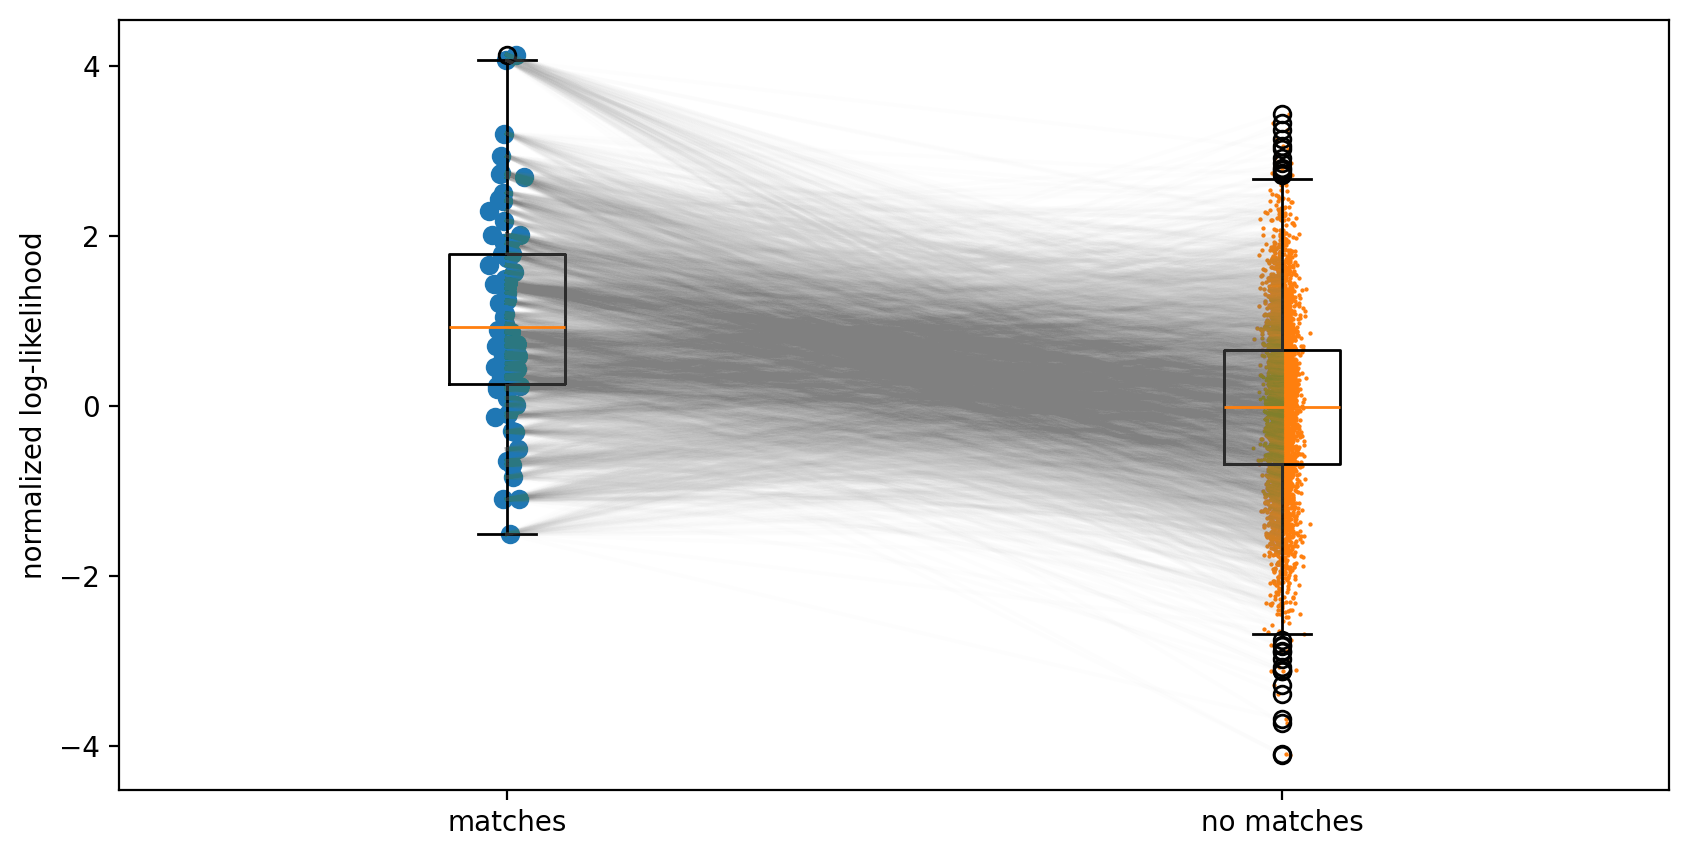

In [20]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from sklearn.metrics import roc_auc_score

matches = score_df_concat[score_df_concat["is_match"]]["score_normalized"]
no_matches = score_df_concat[~score_df_concat["is_match"]]["score_normalized"]
scores = score_df_concat["score_normalized"]

plt.figure(figsize=(10, 5), dpi=200)
plt.boxplot(matches, positions=[0])
plt.boxplot(no_matches, positions=[1])

plt.scatter(np.random.normal(loc=0, scale=0.01, size=len(matches)), matches)
plt.scatter(np.random.normal(loc=1, scale=0.01, size=len(no_matches)), no_matches, alpha=1, s=0.3)

# plot lines
for lsr in score_df_concat["lsr_id"].unique():
    curr_lsr_df = score_df_concat[score_df_concat["lsr_id"] == lsr]
    curr_match_score = curr_lsr_df[curr_lsr_df["attachment_id"] == lsr]["score_normalized"].values[0]
    for s in curr_lsr_df[~(curr_lsr_df["attachment_id"] == lsr)]["score_normalized"]:
      plt.plot([0, 1], [curr_match_score, s], c='gray', alpha=0.01)


plt.xticks([0, 1], ["matches", "no matches"])
plt.ylabel("normalized log-likelihood")
plt.show()

In [21]:
print(matches.mean(), no_matches.mean())
print(ranksums(matches, no_matches))
print("roc_auc:", roc_auc_score(score_df_concat["is_match"], scores))

1.0568186 -0.01625875
RanksumsResult(statistic=7.083200509008368, pvalue=1.408626291420939e-12)
roc_auc: 0.75364837183019
